# Differential Equations 2

Real life problems frequently involve more than one dependent variable. Fortunately little about our previous Runge-Kutta approach needs to change to handle these problems.

First, since we're using computers and we want to write flexible code, we'll turn our dependent variable into a list or array to account for the new term(s). 

Second, the function $f(\vec{r}, t)$ will now compute both/all the relevant equations and return the appropriate list/array.

Consider the simultaneous equations:

$$
\frac{dx}{dt} = xy -x , \qquad \frac{dy}{dt} = y- xy + \sin^2\omega t
$$

Perhaps beginning with previous code, write a program to solve these equations from $t=0$ to $t=10$ given $\omega = 1$, with $ x = y = 1$ at $t=0$. Now that we know fourth-order Runge-Kutta is only a few more lines of code than simpler methods, it should be our first choice going forward.

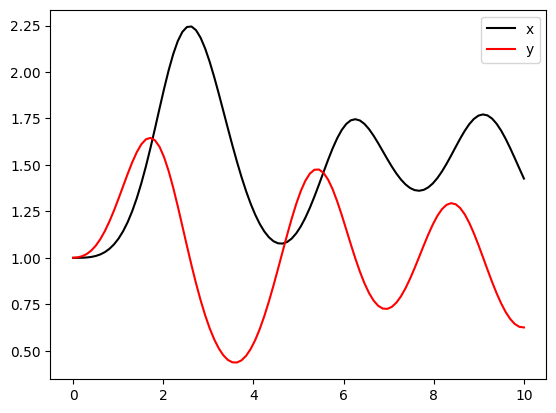

In [ ]:
# code
import numpy as np
import matplotlib.pyplot as plt

def f(r, t):
    dxdt = r[0]*r[1] - r[0]
    dydt = r[1] - r[0]*r[1] + np.sin(omega*t)**2
    return np.array([dxdt, dydt])

def RungeKutta4_DE(func, x0, t0, t_final, steps=1000):
    t_plot = np.linspace(t0, t_final, steps)
    t_step = (t_final - t0) / steps
    x_plot = np.zeros([steps, len(x0)])
    for i in range(steps):
        k1 = func(x0, t0) * t_step
        k2 = func(x0 + k1/2, t0 + t_step/2) * t_step
        k3 = func(x0 + k2/2, t0 + t_step/2) * t_step
        k4 = func(x0 + k3, t0 + t_step) * t_step
        x0 = x0 + (k1 + k2*2 + k3*2 + k4)/6
        x_plot[i] = x0
        t0 += t_step
    return x_plot, t_plot

r0 = np.array([1, 1])
omega = 1
r_points, t_points = RungeKutta4_DE(f, r0, 0, 10, steps=100)

plt.plot(t_points, r_points[:,0], c="k", label="x")
plt.plot(t_points, r_points[:,1], c="r", label="y")
plt.legend()

## Second Order Differential Equations

Section 8.3 discussed a simple method for dealing with second order differential equations: create a system of equations where the first order equation is one of the equations.

Example 8.6 defines a new function $d\theta \over dt$$ = \omega$ in order to turn the second order equation $d^2 \theta \over dt^2 $$= - \frac{g}{l} \sin \theta$ into two first order equations for $\theta$ and $\omega$. The function to use for $f(\vec{r}, t)$ and some constants are given as well. I've copied over the given code for you. Complete the exercise by adding the Runge-Kutta code and plotting.

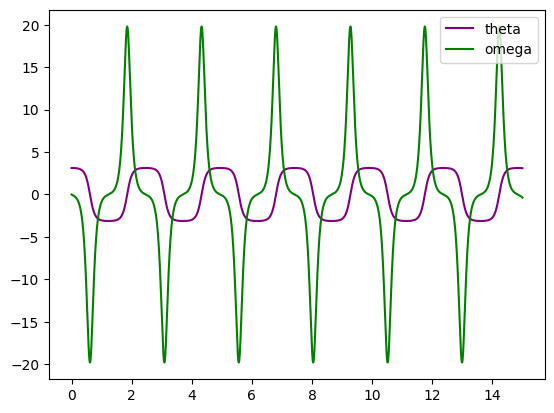

In [ ]:
g = 9.81
l = 0.1

def f(r,t):
    theta = r[0]
    omega = r[1]
    d_theta = omega
    d_omega = - (g / l) * np.sin(theta)
    return np.array([d_theta, d_omega], float)
# runge-kutta here

start = np.array([179 * np.pi/180, 0])

r_points, t_points = RungeKutta4_DE(f, start, 0, 15, steps=3000)

plt.plot(t_points, r_points[:,0], c="purple", label="theta")
plt.plot(t_points, r_points[:,1], c="g", label="omega")
plt.legend()